In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('electric grid')

In [3]:
#data.to_csv('electric grid')

In [4]:
data.head()

,Unnamed: 0,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
data.isnull().sum()

Unnamed: 0    0
tau1          0
tau2          0
tau3          0
tau4          0
p1            0
p2            0
p3            0
p4            0
g1            0
g2            0
g3            0
g4            0
stab          0
stabf         0
dtype: int64

In [6]:
data.shape

(10000, 15)

In [7]:
data = data.drop_duplicates()

In [8]:
data = data.drop(columns=['Unnamed: 0', 'stab'])

In [9]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930


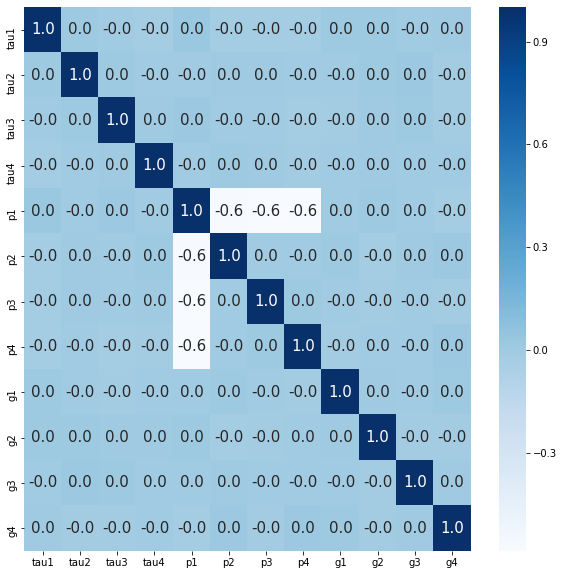

In [10]:
corr = data.corr()
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [11]:
data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [12]:
from sklearn.utils import shuffle

df = shuffle(data)
df = df.reset_index(drop=True)

In [13]:
from sklearn.model_selection import train_test_split

features = df.drop(columns=['stabf'])
target = df['stabf']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [14]:
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}', '\n')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (8000, 12)
x_test: (2000, 12) 

y_train: (8000,)
y_test: (2000,)


In [15]:
y_train.value_counts()

unstable    5086
stable      2914
Name: stabf, dtype: int64

In [16]:
x_test = x_test.reset_index(drop=True)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

> __RandomForest Classifier__

In [18]:
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier(random_state=1)
rfc.fit(scaled_x_train, y_train)

rfc_pred = rfc.predict(scaled_x_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

conf_matrix = confusion_matrix(y_true=y_test, y_pred=rfc_pred, labels=['stable', 'unstable'])
conf_matrix

array([[ 598,  108],
       [  71, 1223]], dtype=int64)

In [59]:
accuracy = accuracy_score(y_true=y_test, y_pred=rfc_pred)
print(f'accuracy: {accuracy*100}')

accuracy: 91.05


In [21]:
precision = precision_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')
print(f'precision: {round((precision*100), 1)}')

precision: 89.4


In [22]:
recall = recall_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')
print(f'recall: {round((recall*100), 1)}')

recall: 84.7


In [60]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      stable       0.89      0.85      0.87       706
    unstable       0.92      0.95      0.93      1294

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000



> __Extra Tree Classifier__

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

etc = ExtraTreesClassifier(random_state=1)
etc.fit(scaled_x_train, y_train)

etc_pred = etc.predict(scaled_x_test)

In [62]:
accuracy = accuracy_score(y_true=y_test, y_pred=etc_pred)
print(f'accuracy: {accuracy*100}')

accuracy: 92.30000000000001


In [24]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=etc_pred, labels=['stable', 'unstable'])
conf_matrix

array([[ 586,  120],
       [  34, 1260]], dtype=int64)

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, etc_pred))

              precision    recall  f1-score   support

      stable       0.95      0.83      0.88       706
    unstable       0.91      0.97      0.94      1294

    accuracy                           0.92      2000
   macro avg       0.93      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



> `Using RandomizedSearchCV to get the best hyperparameters for the extra tree classifier model:`

In [26]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameters_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

search_cv = RandomizedSearchCV(etc, hyperparameters_grid, random_state=1)
search = search_cv.fit(scaled_x_train, y_train)

In [27]:
search.best_params_ # Get the best parameters for the model

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [61]:
etc1 = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None, random_state=1)
etc1.fit(scaled_x_train, y_train)

etc1_pred = etc1.predict(scaled_x_test)

In [63]:
accuracy = accuracy_score(y_true=y_test, y_pred=etc1_pred)
print(f'accuracy: {accuracy*100}')

accuracy: 92.15


In [65]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(etc1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')
importances

,importance
feature,
tau1,0.140
tau2,0.138
tau4,0.136
tau3,0.133
g3,0.113
g2,0.108
g1,0.107
g4,0.106
p2,0.005


In [28]:
search_pred = search_cv.predict(scaled_x_test)

In [29]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=search_pred, labels=['stable', 'unstable'])
conf_matrix

array([[ 599,  107],
       [  50, 1244]], dtype=int64)

In [30]:
print(classification_report(y_test, search_pred))

              precision    recall  f1-score   support

      stable       0.92      0.85      0.88       706
    unstable       0.92      0.96      0.94      1294

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



>__Extreme Gradient Boosting Classifier (xgboost)__

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1)
xgb.fit(scaled_x_train, y_train)

xgb_pred = xgb.predict(scaled_x_test)

In [32]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=xgb_pred, labels=['stable', 'unstable'])
conf_matrix

array([[ 630,   76],
       [  35, 1259]], dtype=int64)

In [33]:
accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print(f'Accuracy: {round((accuracy * 100), 1)}')

Accuracy: 94.4


In [34]:
recall = recall_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable')
print(f'recall_score: {round((recall * 100), 1)}')

recall_score: 89.2


In [35]:
precision = precision_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable')
print(f'precision: {round((precision * 100), 1)}')

precision: 94.7


In [36]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

      stable       0.95      0.89      0.92       706
    unstable       0.94      0.97      0.96      1294

    accuracy                           0.94      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.94      0.94      0.94      2000



>__Light Gradient Boosting (lightgbm)__

In [37]:
#pip install wheel

In [38]:
#pip install lightgbm

In [40]:
# in lightgbm, the categorical data should be an integer. 
#Hence, LabelEncoder will be employed to convert y_train to integer

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encode = encoder.fit_transform(y_train)

In [54]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=1)
lgbm.fit(scaled_x_train, y_train)
lgbm_pred = lgbm.predict(scaled_x_test)

In [55]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=lgbm_pred, labels=['stable','unstable'])
conf_matrix

array([[ 625,   81],
       [  41, 1253]], dtype=int64)

In [66]:
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_pred)
print(f'accuracy: {accuracy*100}')

accuracy: 93.89999999999999


In [56]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

      stable       0.94      0.89      0.91       706
    unstable       0.94      0.97      0.95      1294

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

